In [61]:
from fenics import *
from dolfin import *
from mshr import *
from math import atan2

domain1 = Circle(Point(0, 0), 1.5)
domain2 = Circle(Point(0, 0), 3)
domain3 = Circle(Point(0, 2.25), 0.3)
domain = domain2 - domain1 - domain3
mesh = generate_mesh(domain, 50)
epsilon_0 = 1
epsilon_e = 1
X = FunctionSpace(mesh, 'P', 1)

In [86]:
r = Expression("sqrt(x[0]*x[0]+x[1]*x[1])", degree=1)
theta = Expression("atan2(x[1],x[0])", degree=1)
r1 = Expression("sqrt(x[0]*x[0]+(x[1]-2.25)*(x[1]-2.25))", degree=1)
theta1 = Expression("atan2(x[1]-2.25,x[0])", degree=1)
tol = 1E-3
def outer_boundary(x, on_boundary):
    return on_boundary and sqrt(x[0]*x[0]+x[1]*x[1]) > 3-tol

def inner_boundary(x, on_boundary):
    return on_boundary and (sqrt(x[0]*x[0]+x[1]*x[1])< 1.5 + tol)

#def midup_boundary(x, on_boundry):
#    return on_boundry and sqrt(x[0]*x[0]+(x[1]-2.25)*(x[1]-2.25)) < 0.3+tol

#def middown_boundary(x, on_boundry):
#    return on_boundry and -sqrt(x[0]*x[0]+(x[1]-2.25)*(x[1]-2.25)) < 0.3+tol

def midup_boundary(x, on_boundry):
    theta1 = atan2(x[1]-2.25,x[0])
    return on_boundry and  0+tol < theta1 < pi-tol and sqrt(x[0]*x[0]+(x[1]-2.25)*(x[1]-2.25)) < 0.3+tol

def middown_boundary(x, on_boundry):
    theta1 = atan2(x[1]-2.25,x[0])
    return on_boundry and  -pi-tol < theta1 < 0-tol and sqrt(x[0]*x[0]+(x[1]-2.25)*(x[1]-2.25)) < 0.3+tol


bc = [DirichletBC(X, Expression("0",r=r,t=theta, degree=2), outer_boundary),
       DirichletBC(X, Expression("15",r=r,t=theta, degree=2), inner_boundary),
     DirichletBC(X, Expression("20",r=r1,t=theta1, degree=2), midup_boundary),
     DirichletBC(X, Expression("0",r=r1,t=theta1, degree=2), middown_boundary)]

In [87]:
# Define variational proble
V = TrialFunction(X)
v = TestFunction(X)
rho = Constant(0.5)
a = dot(grad(epsilon_0*epsilon_e*V), grad(v))*dx
L = rho*v*dx

# Compute solution
V = Function(X)
solve(a == L, V, bc)

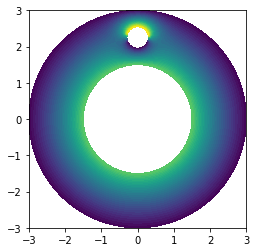

In [88]:
plot(V)